In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import pickle
import lightgbm as lgb

from tqdm import tqdm_notebook

import os
import time
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import librosa  # MFCC feature
from multiprocessing import Pool

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
train = pickle.load(open('./data/train.p', 'rb'))

In [9]:
train.shape

(629145480, 2)

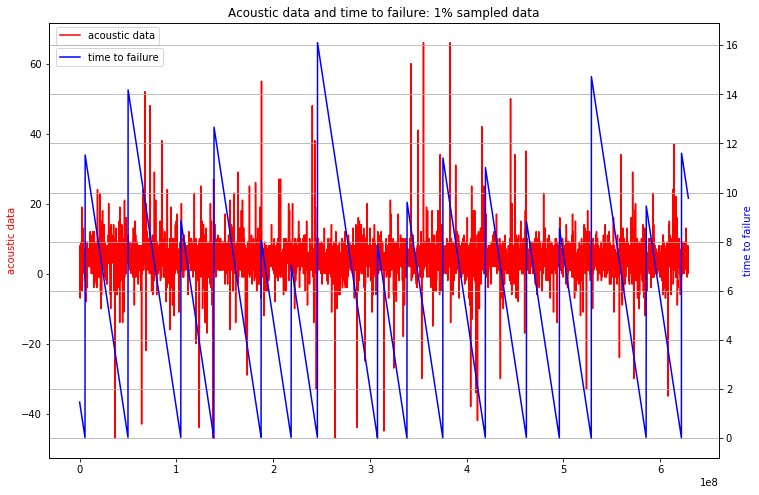

In [13]:



def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 1% sampled data"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)


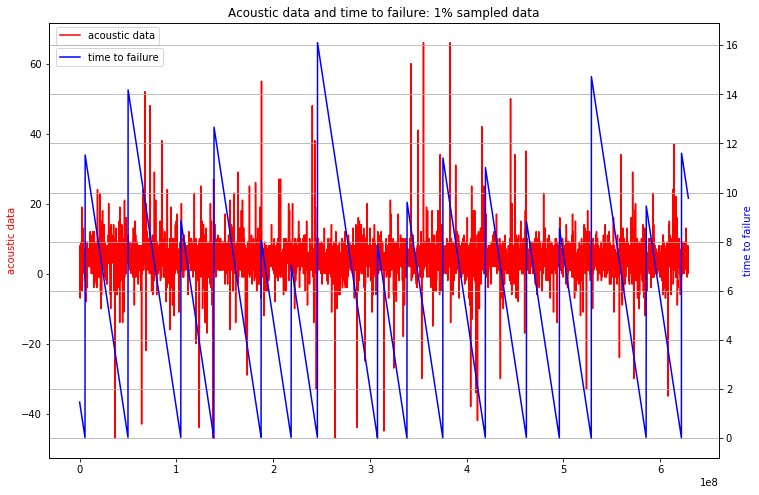

In [16]:
step = 150_000
inital = 1000
train_ad_sample_df = train['acoustic_data'][inital::step]
train_ttf_sample_df = train['time_to_failure'][inital::step]
plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

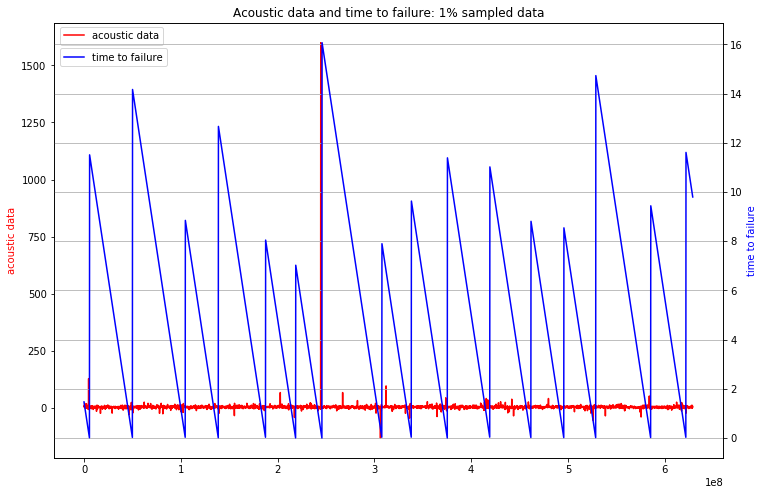

In [17]:
step = 170_000
inital = 1000
train_ad_sample_df = train['acoustic_data'][inital::step]
train_ttf_sample_df = train['time_to_failure'][inital::step]
plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

In [27]:
a = pickle.load(open('./data/earthquake_id.p', 'rb'))

In [10]:
for i, df in a.groupby(a):
    print(i, len(df.index.tolist()))

0 38
1 296
2 364
3 228
4 325
5 207
6 181
7 414
8 203
9 247
10 293
11 283
12 227
13 220
14 378
15 243
16 47


In [10]:
a[a == 0] = 9
a[a == 16] = 3

In [23]:
a.value_counts()

7     414
14    378
2     364
4     325
1     296
10    293
11    283
9     247
15    243
3     228
12    227
13    220
5     207
8     203
6     181
16     47
0      38
dtype: int64

In [21]:
b = LeaveOneGroupOut()
c = b.split(a, groups=a)

In [22]:
for i, j in c:
    print(len(i), len(j))

4156 38
3898 296
3830 364
3966 228
3869 325
3987 207
4013 181
3780 414
3991 203
3947 247
3901 293
3911 283
3967 227
3974 220
3816 378
3951 243
4147 47


In [23]:
os.listdir('./data/features/')

[]

In [2]:
!ls ./data/prediction/

0425_2216_LGBModel_2_CV_2.07_0.83
0425_2231_LGBModel_1_CV_4.15_1.87
0425_2245_LGBModel_1_CV_1.96_0.84
0425_2324_XGBModel_3_CV_1.45_0.85
0425_2329_LGBModel_3_CV_1.95_0.83
0425_2339_CatModel_3_CV_1.48_0.84
0425_2343_SklearnModel_3_CV_2.26_0.82
0426_1826_NuSVR_3_CV_2.26_0.82
0426_1830_SVR_3_CV_2.35_0.84
0426_1843_RandomForest_3_CV_2.20_0.79
0426_2011_LGBModel_3_CV_1.95_0.83
0426_2017_LGBModel_4_CV_1.92_0.80
0426_2019_LGBModel_4_CV_1.92_0.80
0426_2028_LGBModel_4_CV_1.92_0.79
0426_2043_LGBModel_5_CV_1.92_0.78
0426_2044_LGBModel_5_CV_1.92_0.78
0426_2045_LGBModel_6_CV_1.88_0.77
0426_2048_LGBModel_7_CV_1.93_0.76
0427_1552_LGBModel_8_CV_1.88_0.77
0427_1637_LGBModel_9_CV_1.96_0.84
0427_1751_LGBModel_10_CV_1.96_0.82
0427_1753_LGBModel_11_CV_1.92_0.81
0427_1754_LGBModel_12_CV_1.91_0.80
0427_1754_LGBModel_13_CV_1.88_0.77
0427_1754_LGBModel_14_CV_1.87_0.75
0427_1754_LGBModel_15_CV_1.89_0.74
0427_1755_LGBModel_16_CV_1.91_0.75
0427_1755_LGBModel_17_CV_1.99_0.83
0427_1755_LGBModel_18_CV_3.05_0.87
0428_

In [5]:
pred = pickle.load(open('./data/prediction/0504_1217_LGBModel_74_CV_1.97_1.89_0.73', 'rb'))

In [14]:
np.max(pred['oof'])

16.32181958647342

In [2]:
X_tr, y_tr = pickle.load(open('./data/transform.p', 'rb'))

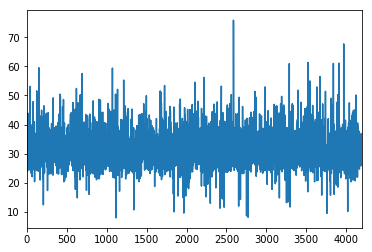

In [3]:
X_tr['spectral_contrast'].plot()

In [28]:
a.tail(50)

4144    15
4145    15
4146    16
4147    16
4148    16
4149    16
4150    16
4151    16
4152    16
4153    16
4154    16
4155    16
4156    16
4157    16
4158    16
4159    16
4160    16
4161    16
4162    16
4163    16
4164    16
4165    16
4166    16
4167    16
4168    16
4169    16
4170    16
4171    16
4172    16
4173    16
4174    16
4175    16
4176    16
4177    16
4178    16
4179    16
4180    16
4181    16
4182    16
4183    16
4184    16
4185    16
4186    16
4187    16
4188    16
4189    16
4190    16
4191    16
4192    16
4193    16
dtype: int64

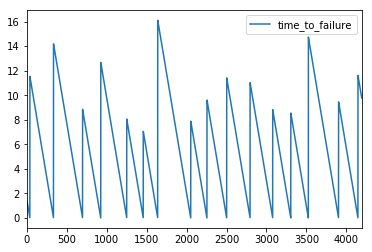

In [30]:
y_tr.plot()

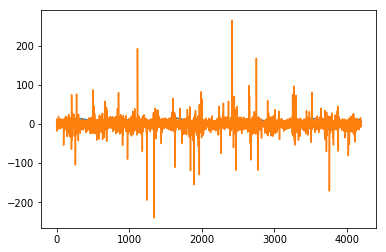

In [16]:
plt.plot(y_tr)
plt.plot(X_tr.iloc[:, 1])
